In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd 
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rcParams['font.family'] = 'serif'
# rcParams['font.sans-serif'] = ['Tahoma']

In [183]:
data = pd.read_csv('tick-aggregate.csv')
data = data.sort_values(by=['N'])
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
e = data.iloc[:, 6].values.reshape(-1, 1)  # error

data.head()

,N,K,Samples,Avg Runtime,Max Runtime,Total Runtime,Std Dev,Makespan,I,J
2,13,2,66,0.114577,0.366189,7.562064,0.065129,33,1,1
5,21,4,114,0.137124,2.166101,15.632128,0.202408,57,2,1
0,23,4,40,0.112642,0.233997,4.505692,0.056521,20,1,2
11,29,6,216,0.121403,0.345103,26.223007,0.056254,108,3,1
1,33,6,52,0.135434,0.295223,7.042546,0.067517,26,1,3


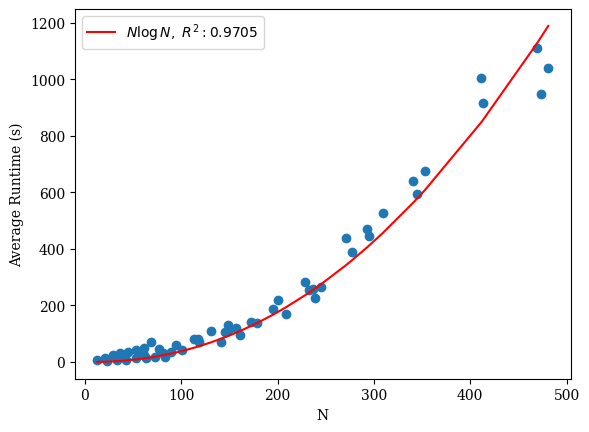

In [184]:
plt.scatter(x, y)
# plt.plot(x, y, 'b-', label='data')

def pred_n(x, a):
  return a * x

def pred_n2(x, a):
  return a * x**2

def pred_n3(x, a):
  return a * x**3

def pred_n4(x, a):
  return a * x**4

# (1/4) N (N + 1)^2
def pred_avg_of_n3(x, a):
  return a * x * (x + 1)**2

# (1/6) (N + 1) (2N + 1)
def pred_avg_of_n2(x, a):
  return a * (x + 1) * (2 * x + 1)

def pred_n_log_n(x, a):
  return a * x * np.log(x)

def pred_n2_log_n(x, a):
  return a * x**2 * np.log(x)

popt, pcov = curve_fit(pred_n2_log_n, x.transpose()[0], y.transpose()[0])
coefficient_of_dermination = r2_score(y, pred_n2_log_n(x.transpose()[0], *popt))

# plt.plot(x.transpose()[0], pred_n2_log_n(x.transpose()[0], *popt), 'r-', label='$N^2 \log N,~R^2: %.4f$' % coefficient_of_dermination)
plt.plot(x.transpose()[0], pred_n2_log_n(x.transpose()[0], *popt), 'r-', label='$N^2 \log N,~R^2: %.4f$' % coefficient_of_dermination)
# plt.errorbar(x.transpose()[0], y.transpose()[0], e.transpose()[0], linestyle='None')

plt.xlabel('N')
# plt.ylabel('Total Runtime (s)')
plt.ylabel('Average Runtime (s)')
plt.legend()
# plt.savefig("../images/scheduling-total-runtime.png", dpi=300, bbox_inches="tight")
plt.savefig("../images/tick-total-runtime.png", dpi=300, bbox_inches="tight")
plt.show()

In [126]:

coefficient_of_dermination

0.8644937949655267

In [95]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

linear_regressor = LinearRegression()
linear_regressor.fit(poly_features, y)
# linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(poly_features)  # make predictions

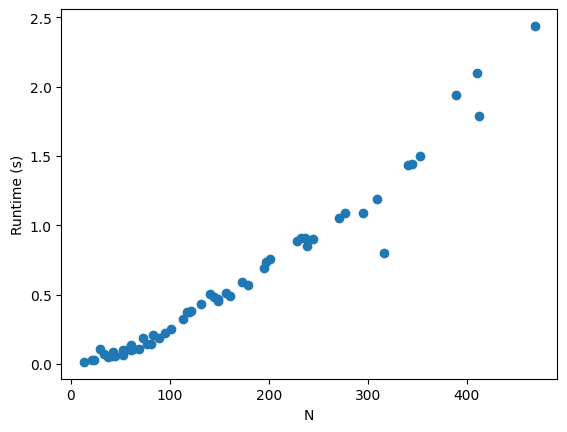

In [96]:
plt.scatter(x, y)
plt.xlabel("N")
plt.ylabel("Runtime (s)")
# plt.plot(x, y_pred, color='red')
plt.show()

In [97]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x, y_pred)


LinearRegression()

In [98]:
poly_reg_rmse = np.sqrt(mean_squared_error(y, y_pred))
poly_reg_rmse

0.0840475627708661

In [101]:
np.linalg.cond(pcov)

1.0

BENCH: Found 1x7 STNU, N: 30, K: 36
BENCH: Found 1x1 STNU, N: 6, K: 6
BENCH: Found 6x1 STNU, N: 26, K: 26
BENCH: Found 1x5 STNU, N: 22, K: 26
BENCH: Found 2x1 STNU, N: 10, K: 10
BENCH: Found 3x1 STNU, N: 14, K: 14
BENCH: Found 4x2 STNU, N: 34, K: 38
BENCH: Found 2x5 STNU, N: 42, K: 50
BENCH: Found 8x1 STNU, N: 34, K: 34
BENCH: Found 1x6 STNU, N: 26, K: 31
BENCH: Found 1x2 STNU, N: 10, K: 11
BENCH: Found 1x3 STNU, N: 14, K: 16
BENCH: Found 5x1 STNU, N: 22, K: 22
BENCH: Found 3x3 STNU, N: 38, K: 44
BENCH: Found 4x4 STNU, N: 66, K: 78
BENCH: Found 2x6 STNU, N: 50, K: 60
BENCH: Found 4x1 STNU, N: 18, K: 18
BENCH: Found 2x2 STNU, N: 18, K: 20
BENCH: Found 2x4 STNU, N: 34, K: 40
BENCH: Found 5x3 STNU, N: 62, K: 72
BENCH: Found 3x4 STNU, N: 50, K: 59
BENCH: Found 4x3 STNU, N: 50, K: 58
BENCH: Found 1x8 STNU, N: 34, K: 41
BENCH: Found 4x5 STNU, N: 82, K: 98
BENCH: Found 2x3 STNU, N: 26, K: 30
BENCH: Found 3x2 STNU, N: 26, K: 29
BENCH: Found 1x4 STNU, N: 18, K: 21
BENCH: Found 5x2 STNU, N: 42, K: 47
BENCH: Found 7x2 STNU, N: 58, K: 65
BENCH: Found 3x5 STNU, N: 62, K: 74
BENCH: Found 4x6 STNU, N: 98, K: 118
BENCH: Found 8x2 STNU, N: 66, K: 74
BENCH: Found 5x4 STNU, N: 82, K: 97
BENCH: Found 7x1 STNU, N: 30, K: 30
BENCH: Found 6x2 STNU, N: 50, K: 56
BENCH: Found 6x3 STNU, N: 74, K: 86
BENCH: Found 2x7 STNU, N: 58, K: 70
BENCH: Found 6x4 STNU, N: 98, K: 116
BENCH: Found 8x3 STNU, N: 98, K: 114